# Breaking down data.gov climate data

Data.gov maintains a list of climate related datasets, but they are maintained by different agencies.  I'd like to get a sense of the number and diversity of these datasets, and which agencies they are coming from.

In [1]:
import requests
import requests_ftp
import requests_cache
import lxml
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('ggplot')
requests_cache.install_cache('coll_cache')
%matplotlib inline

I went to data.gov and selected the climate data tab.  Here is the url: https://catalog.data.gov/dataset?groups=climate5434&page=1

Let's make a request for this page.  To install requests-ftp use pip or conda.

In [2]:
urlbase = "https://catalog.data.gov/dataset"
dataparams = {"groups":"climate5434","page":1}
climreq = requests.get(urlbase,params = dataparams)

In [3]:
climhtml = climreq.text
clim = BeautifulSoup(climhtml,'lxml-xml')

Here we imported the climate data catalogue (page 1), and turned it into a Beautiful Soup object.  We used the lxml parser, which is why we had to import lxml.  Let's look at the raw html.

In [4]:
print(climhtml[:500])

<!DOCTYPE html>
<!--[if IE 7]> <html lang="en" class="ie ie7"> <![endif]-->
<!--[if IE 8]> <html lang="en" class="ie ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en"> <!--<![endif]-->
  <head>
    <!--[if lte ie 8]><script type="text/javascript" src="/fanstatic/vendor/:version:2018-01-17T19:07:30.98/html5.min.js"></script><![endif]-->
<link rel="stylesheet" type="text/css" href="/fanstatic/vendor/:version:2018-01-17T19:07:30.98/se


In [5]:
print(clim.prettify()[:500])

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<!--[if IE 7]> <html lang="en" class="ie ie7"> <![endif]-->
<!--[if IE 8]> <html lang="en" class="ie ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <!--[if lte ie 8]><script type="text/javascript" src="/fanstatic/vendor/:version:2018-01-17T19:07:30.98/html5.min.js"></script><![endif]-->
  <link href="/fanstatic/vendor/:version:2018-01-17T19:07:30


The BS object, and tags have other tags within then that you can access either as a class object (like below) or using the find method

In [6]:
print(clim.body.prettify()[:500])

<body data-locale-root="https://catalog.data.gov/" data-site-root="https://catalog.data.gov/">
 <div class="hide">
  <a href="#content">
   Skip to content
  </a>
 </div>
 <a class="hide" href="#content">
  Skip to content
 </a>
 <header class="navbar navbar-static-top masthead">
  <div class="container">
   <div class="searchbox-row skip-navigation">
    <div class="skip-link">
     <a href="#">
      Jump to Content
     </a>
    </div>
    <div>
     <form action="/dataset" class="search-form


In [7]:
collset_content = clim.find_all(name='div',attrs={'class':'dataset-content'})

In [8]:
collset_content

[<div class="dataset-content">
 <div class="organization-type-wrap">
 <span class="organization-type" data-organization-type="federal" title="Federal Government">
 <span>Federal</span>
 </span>
 </div>
 <h3 class="dataset-heading">
 <a href="/dataset/u-s-hourly-precipitation-data">U.S. Hourly Precipitation Data</a>
 <!-- Snippet snippets/popular.html start -->
 <span class="recent-views" title="1063 recent views" xmlns="http://www.w3.org/1999/xhtml">
 <i class="fa fa-line-chart"/> 1063 recent views
 </span>
 <!-- Snippet snippets/popular.html end -->
 </h3>
 <div class="notes">
 <p class="dataset-organization">National Oceanic and Atmospheric Administration, Department of Commerce </p>
 <div>Hourly Precipitation Data (HPD) is digital data set DSI-3240, archived at the National Climatic Data Center (NCDC). The primary source of data for this file is...</div>
 </div>
 <ul class="dataset-resources unstyled">
 <li>
 <a class="label" data-format="html" data-organization="National Oceanic an

In [9]:
type(collset_content[0])

bs4.element.Tag

In [10]:
collset1 = collset_content[0]

In [11]:
print(collset1.prettify())

<div class="dataset-content">
 <div class="organization-type-wrap">
  <span class="organization-type" data-organization-type="federal" title="Federal Government">
   <span>
    Federal
   </span>
  </span>
 </div>
 <h3 class="dataset-heading">
  <a href="/dataset/u-s-hourly-precipitation-data">
   U.S. Hourly Precipitation Data
  </a>
  <!-- Snippet snippets/popular.html start -->
  <span class="recent-views" title="1063 recent views" xmlns="http://www.w3.org/1999/xhtml">
   <i class="fa fa-line-chart"/>
   1063 recent views
  </span>
  <!-- Snippet snippets/popular.html end -->
 </h3>
 <div class="notes">
  <p class="dataset-organization">
   National Oceanic and Atmospheric Administration, Department of Commerce
  </p>
  <div>
   Hourly Precipitation Data (HPD) is digital data set DSI-3240, archived at the National Climatic Data Center (NCDC). The primary source of data for this file is...
  </div>
 </div>
 <ul class="dataset-resources unstyled">
  <li>
   <a class="label" data-forma

In [12]:
collset1.name

'div'

In [13]:
collset1.attrs

{'class': 'dataset-content'}

In [14]:
collset1['class']

'dataset-content'

In [15]:
for child in collset1.children:
    print(child.name)

None
div
None
h3
None
div
None
ul
None


In [16]:
collset1.ul.find_all('li')

[<li>
 <a class="label" data-format="html" data-organization="National Oceanic and Atmospheric Administration, Department of Commerce" href="https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00313" target="_blank">HTML</a>
 </li>, <li>
 <a class="label" data-format="html" data-organization="National Oceanic and Atmospheric Administration, Department of Commerce" href="https://www.ncdc.noaa.gov/cdo-web/search?datasetid=PRECIP_HLY#" target="_blank">HTML</a>
 </li>, <li>
 <a class="label" data-format="html" data-organization="National Oceanic and Atmospheric Administration, Department of Commerce" href="https://gis.ncdc.noaa.gov/maps/ncei/cdo/hourly?layers=001" target="_blank">HTML</a>
 </li>, <li>
 <a class="label" data-format="html" data-organization="National Oceanic and Atmospheric Administration, Department of Commerce" href="ftp://ftp.ncdc.noaa.gov/pub/data/hourly_precip-3240/" target="_blank">HTML</a>
 </li>, <li>
 <a class="label" data-format="esri rest" data-organization="

While going through the list items is one way to extract the dataset url's, I'd rather just use the 'a' tag instead.

In [17]:
aset1 = collset1.find_all('a')

In [18]:
print(aset1)

[<a href="/dataset/u-s-hourly-precipitation-data">U.S. Hourly Precipitation Data</a>, <a class="label" data-format="html" data-organization="National Oceanic and Atmospheric Administration, Department of Commerce" href="https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00313" target="_blank">HTML</a>, <a class="label" data-format="html" data-organization="National Oceanic and Atmospheric Administration, Department of Commerce" href="https://www.ncdc.noaa.gov/cdo-web/search?datasetid=PRECIP_HLY#" target="_blank">HTML</a>, <a class="label" data-format="html" data-organization="National Oceanic and Atmospheric Administration, Department of Commerce" href="https://gis.ncdc.noaa.gov/maps/ncei/cdo/hourly?layers=001" target="_blank">HTML</a>, <a class="label" data-format="html" data-organization="National Oceanic and Atmospheric Administration, Department of Commerce" href="ftp://ftp.ncdc.noaa.gov/pub/data/hourly_precip-3240/" target="_blank">HTML</a>, <a class="label" data-format="esr

Here is the title of the dataset collection, let's make a script to extract the title and href's from the 'a' tags.

In [19]:
aset1[0].text

'U.S. Hourly Precipitation Data'

In [20]:
aset1[0].attrs

{'href': '/dataset/u-s-hourly-precipitation-data'}

In [21]:
adict = {'label':[],'coll':[],'more':[]}
for a in aset1:
    try:
        adict[a['class']].append(a['href'])
    except KeyError:
        adict['coll'].append(a['href'])
        collname = a.text.strip()

In [22]:
collname

'U.S. Hourly Precipitation Data'

In [23]:
adict

{'coll': ['/dataset/u-s-hourly-precipitation-data'],
 'label': ['https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00313',
  'https://www.ncdc.noaa.gov/cdo-web/search?datasetid=PRECIP_HLY#',
  'https://gis.ncdc.noaa.gov/maps/ncei/cdo/hourly?layers=001',
  'ftp://ftp.ncdc.noaa.gov/pub/data/hourly_precip-3240/',
  'https://gis.ncdc.noaa.gov/arcgis/rest/services/cdo/precip_hly/MapServer',
  '/dataset/u-s-hourly-precipitation-data/resource/126aedd4-9d30-4a8f-86c4-144575762fb2'],
 'more': ['/dataset/u-s-hourly-precipitation-data']}

We are also able to get the description component of the collection.

In [24]:
collnotes = collset1.find('div',attrs={'class':'notes'})

In [25]:
print(collnotes.prettify())

<div class="notes">
 <p class="dataset-organization">
  National Oceanic and Atmospheric Administration, Department of Commerce
 </p>
 <div>
  Hourly Precipitation Data (HPD) is digital data set DSI-3240, archived at the National Climatic Data Center (NCDC). The primary source of data for this file is...
 </div>
</div>



In [26]:
collnotes.p.text.strip()

'National Oceanic and Atmospheric Administration, Department of Commerce'

In [27]:
collnotes.div.text.strip()

'Hourly Precipitation Data (HPD) is digital data set DSI-3240, archived at the National Climatic Data Center (NCDC). The primary source of data for this file is...'

In [28]:
collorg = collnotes.p.text.strip()
colldesc = collnotes.div.text.strip()

Now that we have some code to process the collection html, let's create a def to modularize this section.

In [29]:
def process_collset(collset1):
    """
    Processes the data.gov html within the tags <div class = dataset-content>...
    Input: html string
    Output: tuple of title (string), organization (string), 
      description (string), hrefs (dictionary)
    """
    aset1 = collset1.find_all('a')
    adict = {'label':[],'coll':[],'more':[]}
    for a in aset1:
        try:
            adict[a['class']].append(a['href'])
        except KeyError:
            adict['coll'].append(a['href'])
            collname = a.text.strip()
    collnotes = collset1.find('div',attrs={'class':'notes'})
    collorg = collnotes.p.text.strip()
    colldescdiv = collnotes.div
    if colldescdiv:
        colldesc = colldescdiv.text.strip()
    else:
        colldesc = ""
    return collname, collorg, colldesc, adict

In [30]:
help(process_collset)

Help on function process_collset in module __main__:

process_collset(collset1)
    Processes the data.gov html within the tags <div class = dataset-content>...
    Input: html string
    Output: tuple of title (string), organization (string), 
      description (string), hrefs (dictionary)



In [31]:
collname, collorg, colldesc, adict = process_collset(collset1)

In [32]:
collname

'U.S. Hourly Precipitation Data'

In [33]:
collorg

'National Oceanic and Atmospheric Administration, Department of Commerce'

In [34]:
colldesc

'Hourly Precipitation Data (HPD) is digital data set DSI-3240, archived at the National Climatic Data Center (NCDC). The primary source of data for this file is...'

In [35]:
adict

{'coll': ['/dataset/u-s-hourly-precipitation-data'],
 'label': ['https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00313',
  'https://www.ncdc.noaa.gov/cdo-web/search?datasetid=PRECIP_HLY#',
  'https://gis.ncdc.noaa.gov/maps/ncei/cdo/hourly?layers=001',
  'ftp://ftp.ncdc.noaa.gov/pub/data/hourly_precip-3240/',
  'https://gis.ncdc.noaa.gov/arcgis/rest/services/cdo/precip_hly/MapServer',
  '/dataset/u-s-hourly-precipitation-data/resource/126aedd4-9d30-4a8f-86c4-144575762fb2'],
 'more': ['/dataset/u-s-hourly-precipitation-data']}

In [36]:
for collset in collset_content:
    collname = process_collset(collset)[0]
    print(collname)

U.S. Hourly Precipitation Data
1 meter Digital Elevation Models (DEMs) - USGS National Map 3DEP Downloadable Data Collection
Fruit and Vegetable Prices
American FactFinder II
National Flood Hazard Layer (NFHL)
USGS National Transportation Dataset (NTD) Downloadable Data Collection
Food Environment Atlas
Statistical Abstract of the United States
USGS US Topo Map Collection
Farm Programs Payments
FluView National Flu Activity Map
NCDC Storm Events Database
Population Estimates
National Hydrography Dataset (NHD) - USGS National Map Downloadable Data Collection
U.S. Daily Climate Normals (1981-2010)
Food Price Outlook
Quick Stats Agricultural Database
Military Installations, Ranges, and Training Areas
Soil Survey Geographic Database (SSURGO)
Feed Grains Database


Let's modularize the queries from data.gov.

In [37]:
def clim_page(urlbase = "https://catalog.data.gov/dataset", groups="climate5434",
              page=1):
    """
    Queries the data.gov climate change data search for a specific page
    Input: urlbase, groups, page (strings)
    Output: list of dataset-content 
    """
    dataparams = {"groups":groups,"page":page}
    climreq = requests.get(urlbase,params = dataparams)
    clim_bs = BeautifulSoup(climreq.text,'lxml-xml')
    collset_content = clim_bs.find_all(name='div',attrs={'class':'dataset-content'})
    return collset_content

In [38]:
clim = clim_page(page=2)

In [39]:
print([process_collset(c)[0] for c in clim])

['1/3rd arc-second Digital Elevation Models (DEMs) - USGS National Map 3DEP Downloadable Data Collection', 'National Solar Radiation Data Base', 'MyPyramid Food Raw Data', 'CDC WONDER: Cancer Statistics', 'Total Energy Data and Statistics', 'USGS Water-Quality Data for the Nation - National Water Information System (NWIS)', 'USGS National Structures Dataset - USGS National Map Downloadable Data Collection', 'Commodity Flow Survey', 'Population by Country (1980 - 2010)', 'Aquaculture Data', 'Healthcare Cost and Utilization Project (HCUP) - National Inpatient Sample', 'U.S. Food Imports', 'CMS Statistics', 'Census Data', 'United States Renewable Energy Technical Potential', 'U.S. Monthly Climate Normals (1981-2010)', 'CDC WONDER: Births', 'Protected Areas Database of the United States (PAD-US)', 'NOAA Climate Data Record (CDR) of Sea Surface Temperature - WHOI, Version 1.0 (Version Superseded)', 'https://nassgeodata.gmu.edu/CropScape/']


Here we extract all of the pages from the climate group from data.gov.

In [40]:
page_num_max = 34
climate_colls = []
for page_num in range(1,page_num_max+1):
    try:
        clim = clim_page(page=page_num)
        if clim != None:
            climate_colls += [process_collset(c) for c in clim]
        else:
            break
    except requests.HTTPError:
        break

In [41]:
climate_colls.__len__()

616

In [42]:
climate_colls[0][3]

{'coll': ['/dataset/u-s-hourly-precipitation-data'],
 'label': ['https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00313',
  'https://www.ncdc.noaa.gov/cdo-web/search?datasetid=PRECIP_HLY#',
  'https://gis.ncdc.noaa.gov/maps/ncei/cdo/hourly?layers=001',
  'ftp://ftp.ncdc.noaa.gov/pub/data/hourly_precip-3240/',
  'https://gis.ncdc.noaa.gov/arcgis/rest/services/cdo/precip_hly/MapServer',
  '/dataset/u-s-hourly-precipitation-data/resource/126aedd4-9d30-4a8f-86c4-144575762fb2'],
 'more': ['/dataset/u-s-hourly-precipitation-data']}

I'll build a dataframe so that I can count the data collections by organization.

In [43]:
climate_df = pd.DataFrame({'name':c[0],'organization':c[1],'description':c[2]}
                          for c in climate_colls)

In [44]:
climate_df

,description,name,organization
0,Hourly Precipitation Data (HPD) is digital dat...,U.S. Hourly Precipitation Data,National Oceanic and Atmospheric Administratio...
1,This is a tiled collection of the 3D Elevation...,1 meter Digital Elevation Models (DEMs) - USGS...,"U.S. Geological Survey, Department of the Inte..."
2,How much do fruits and vegetables cost? ERS es...,Fruit and Vegetable Prices,Department of Agriculture
3,American FactFinder is the Census Bureau's onl...,American FactFinder II,Department of Commerce
4,The National Flood Hazard Layer (NFHL) is a co...,National Flood Hazard Layer (NFHL),Department of Homeland Security
5,The USGS Transportation downloadable data from...,USGS National Transportation Dataset (NTD) Dow...,"U.S. Geological Survey, Department of the Inte..."
6,Food environment factors--such as store/restau...,Food Environment Atlas,Department of Agriculture
7,"First published in 1878, the Statistical Abstr...",Statistical Abstract of the United States,Department of Commerce
8,Layered GeoPDF 7.5 Minute Quadrangle Map. Laye...,USGS US Topo Map Collection,"U.S. Geological Survey, Department of the Inte..."
9,Payments made by the Department of Agriculture...,Farm Programs Payments,Department of Agriculture


In [45]:
org_count = climate_df.groupby('organization').count()

In [46]:
org_count.sort_values(by='name',ascending=False)

,description,name
organization,,
National Aeronautics and Space Administration,148,148
"National Oceanic and Atmospheric Administration, Department of Commerce",142,142
Department of the Interior,70,70
Department of Agriculture,63,63
U.S. Environmental Protection Agency,58,58
Department of Energy,41,41
U.S. Department of Health Human Services,32,32
Department of Transportation,30,30
"U.S. Geological Survey, Department of the Interior",10,10


In [47]:
org_count_abbr = org_count[org_count['name'] > 20]

In [48]:
rem_count = org_count[org_count['name'] <= 20].sum()[0]

In [49]:
type(rem_count)

numpy.int64

In [50]:
org_count_abbr = org_count_abbr.append(pd.DataFrame({'name':[rem_count]}, 
                                                    index=['Other']))
org_count_abbr = org_count_abbr[['name']].rename(columns={'name':'count'})

In [51]:
org_count_abbr

,count
Department of Agriculture,63
Department of Energy,41
Department of Transportation,30
Department of the Interior,70
National Aeronautics and Space Administration,148
"National Oceanic and Atmospheric Administration, Department of Commerce",142
U.S. Department of Health Human Services,32
U.S. Environmental Protection Agency,58
Other,32


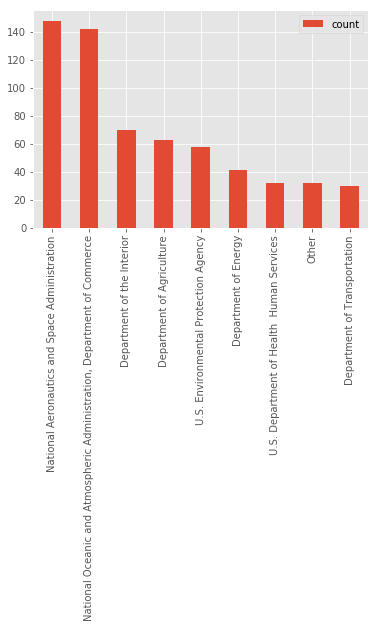

In [52]:
_ = org_count_abbr.sort_values(by='count',ascending=False).plot(y='count',kind='bar')

In [53]:
org_sorted = org_count_abbr.sort_values(by='count',ascending=False).index.values

# Tracking the status of datasets
Let's make some defs to query the dataset urls.  The first is for converting relative paths to urls, and the second returns the status of the request to that url.

In [54]:
def reltoabs(url,urlbase = "https://catalog.data.gov"):
    """
    Input: url string
    Output: url string
    """
    if url[0]=='/':
        return urlbase+url
    if (url[:6] == "http:/") and (not url[6] == "/"):
        return "http://" + url[6:]
    return url

In [62]:
def testurl(url):
    """
    Input: url
    Output: request status code
    """
    try:
        if url[:4] == 'http':
            r = requests.head(url)
            return r.status_code
        if url[:3] == 'ftp':
            requests_ftp.monkeypatch_session()
            s = requests.Session()
            resp = s.list(url)
            return resp.status_code
    except requests.ConnectionError:
        return None

In [56]:
[a for a in climate_colls[0][3]['label']]

['https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00313',
 'https://www.ncdc.noaa.gov/cdo-web/search?datasetid=PRECIP_HLY#',
 'https://gis.ncdc.noaa.gov/maps/ncei/cdo/hourly?layers=001',
 'ftp://ftp.ncdc.noaa.gov/pub/data/hourly_precip-3240/',
 'https://gis.ncdc.noaa.gov/arcgis/rest/services/cdo/precip_hly/MapServer',
 '/dataset/u-s-hourly-precipitation-data/resource/126aedd4-9d30-4a8f-86c4-144575762fb2']

In [ ]:
urlstats=[]
errors = []
for coll in climate_colls:
    urlstattemp = []
    for urlrel in coll[3]['label']:
        try:
            print(url)
            url = reltoabs(urlrel)
            urlstatus = testurl(url)
            urlstattemp += [urlstatus]
        except BaseException as e:
            print(urlrel)
            errors.append((e,urlrel))
    urlstats.append(urlstattemp)

https://water.usgs.gov/GIS/dsdl/nhd_popdens_mrb6.zip
https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00313
https://www.ncdc.noaa.gov/cdo-web/search?datasetid=PRECIP_HLY#
https://gis.ncdc.noaa.gov/maps/ncei/cdo/hourly?layers=001
ftp://ftp.ncdc.noaa.gov/pub/data/hourly_precip-3240/
https://gis.ncdc.noaa.gov/arcgis/rest/services/cdo/precip_hly/MapServer
https://catalog.data.gov/dataset/u-s-hourly-precipitation-data/resource/126aedd4-9d30-4a8f-86c4-144575762fb2
https://thor-f5.er.usgs.gov/ngtoc/metadata/waf/elevation/1_meter/
https://prd-tnm.s3.amazonaws.com/index.html?prefix=StagedProducts/Elevation/1m/IMG/
https://services.nationalmap.gov/arcgis/rest/services/3DEPElevationIndex/MapServer
https://catalog.data.gov/dataset/usgs-national-elevation-dataset-ned-1-meter-downloadable-data-collection-from-the-national-map-/resource/ca4babd7-eb82-4112-9fd7-371f2e8b4955
https://nationalmap.gov/3DEP/
https://viewer.nationalmap.gov/
http://www.ers.usda.gov/data-products/fruit-and-vegetable-p

https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00822
ftp://ftp.ncdc.noaa.gov/pub/data/normals/1981-2010/
https://www.ncdc.noaa.gov/cdo-web/search?datasetid=NORMAL_MLY
https://gis.ncdc.noaa.gov/maps/ncei/normals&layers=001
https://gis.ncdc.noaa.gov/arcgis/rest/services/cdo/normals/MapServer
https://catalog.data.gov/dataset/u-s-monthly-climate-normals-1981-2010/resource/56287422-1767-4ac2-baa9-5e3b0e9e447f
http://wonder.cdc.gov/natality.html
http://dx.doi.org/10.5066/F7G73BSZ
http://gapanalysis.usgs.gov/PADUS
http://A Variety of web mapping services are available to accompany the data and to help visualize the data in many ways. These Services can be viewed through the PAD-US Online Map Viewer (http://gapanalysis.usgs.gov/padus/viewer/) or can be accessed and consumed by other web mapping applications using the links provided here:(http://gapanalysis.usgs.gov/data/web-services/)
http://A Variety of web mapping services are available to accompany the data and to help visualize t

In [58]:
len(errors)

112

In [61]:
errors[1]

(AttributeError("'_ConfiguredCachedSession' object has no attribute 'list'"),
 'ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/NHD/')

In [59]:
len(urlstats)

616

We can see that urlstats contains the request status of the urls that are listed on data.gov.  So let's make a def that converts each list of status returns into a dict of counts of each type.  This way we can pass it to pd.DataFrame

In [318]:
urlstats[0:10]

[[200, 200, 404, 503, 200, 302],
 [301, 301, 200, None, 301, 200],
 [200],
 [200, 200, 301, 302, 301, 301],
 [200, 405, 200],
 [200],
 [200],
 [301, 301, 301, 301, 301, 301],
 [200],
 [200, 200, 200, 404, 200, 301]]

In [319]:
def convstatnames(stats):
    """Return a dictionary of counts"""
    sdict = dict(Counter(stats))
    return {'status_'+str(a):b for a,b in sdict.items()}

stat_df = pd.DataFrame([convstatnames(stats) for stats in urlstats])
stat_df = stat_df.fillna(0)
stat_df.head()

failedstatus = ['status_400','status_404','status_405','status_503','status_None']
stat_df['failed ratio'] = stat_df[failedstatus].sum(axis=1)/stat_df.sum(axis=1)

We've also created a variable which is the proportion of urls that returned a status in the 400's or 500's or None.  Let's now join this against the climate_df to get one DataFrame of all unique combinations of failed ratio and organization.  Retain only the most common organizations.

In [ ]:
climate_df = climate_df.join(stat_df)
climate_failed = climate_df.groupby(['organization','failed ratio'])
failed_count = climate_failed.count()[['name']].rename(columns={'name':'count'})
failed_count = failed_count.reset_index()
red_orgs = org_count[org_count['name'] > 20].index
failed_count_red = failed_count[[org in red_orgs for org in failed_count['organization']]]
failed_count_red.head()

In [322]:
org_numbers = {org_sorted[i]:i+1 for i in range(len(org_sorted))}
failed_count_red['org number'] = failed_count_red['organization'].apply(lambda o: org_numbers[o])

C:\Users\James Sharpnack\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [328]:
failed_count_red.head()

,organization,failed ratio,count,org number
0,Arctic Landscape Conservation Cooperative,0.000000,41,6
2,Department of Agriculture,0.000000,48,4
3,Department of Agriculture,0.250000,1,4
4,Department of Agriculture,0.333333,3,4
5,Department of Agriculture,0.500000,1,4


1: National Oceanic and Atmospheric Administration, Department of Commerce
2: U.S. Geological Survey, Department of the Interior
3: National Aeronautics and Space Administration
4: Department of Agriculture
5: Department of Energy
6: Arctic Landscape Conservation Cooperative
7: Other
8: U.S. Department of Health  Human Services
9: Department of Transportation
10: U.S. Environmental Protection Agency


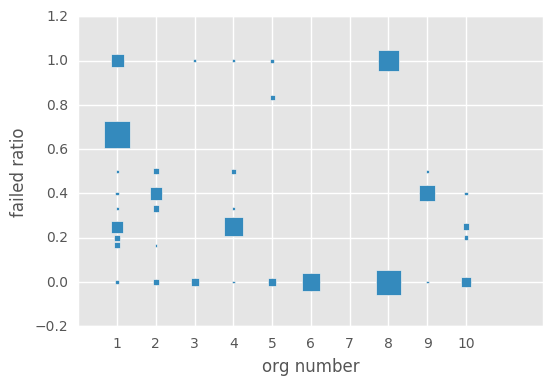

In [330]:
from operator import itemgetter
norgs=len(org_numbers)
_ = failed_count_red.plot(x = 'org number',y = 'failed ratio',xticks=range(1,norgs+1),
                      s=failed_count['count']*4,kind='scatter',marker='s')
for orgname,i in sorted(org_numbers.items(),key=itemgetter(1)):
    print "{}: {}".format(i,orgname)